# Identificação e Mapeamento autônomo de linhas e falhas de Cana de Açúcar

Neste trabalho é proposto um algoritmo para a detecção e mapeamento de linhas e falhas na cultura da cana de açúcar. O sistema de visão computacional foi desenhado para utilizar imagens áreas provenientes de sensores acoplados a sistemas embarcados. O algoritmo é constituído de duas etapas, a de pré processamento, em que são eliminados ruídos e evidenciados os objetos de interesse. Na segunda etapa são aplicados os filtros de Canny, para a detecção de bordas e, posteriormente, o algoritmo de Suzuki para a detecção de contornos.


## Introdução

- O indice de falhas na cultura da cana de açúcar é um importante indicador da qualidade do canavial.
- O georeferenciamento das linhas de plantio são impressindíveis para sistemas de agricultura de precisão.

## Objetivos
    
- Identificar falhas.
- Georeferênciar linhas da cultura.
- Contar touceiras.
- Portar software para as arquiteturas ARM, AVR e esp8266
- Implementar em sistemas embarcados

## Instalação

Para utilizar este projeto é necessário fazer o download do mesmo [neste](https://github.com/joaoTrevizoli/python_agriculture_cv) repositório.

Para instalar, abra o terminal e digite:

```sh
$ cd python_agriculture_cv
$ pip install -r requirements.txt
```

Para testar o exemplo e ver se o package está funcionando digite:

```sh
$ python main.py
```

Para utilizar o interativo jupyter notebook digite

```sh
$ jupyter notebook
```

In [1]:
%matplotlib inline
from sugarcane_line_finder import *
from matplotlib import pyplot as plt

import os
import sys
import cv2
import re

b_path = base_path()
images = os.listdir("{}/{}".format(b_path, "base_images"))
images

['.DS_Store',
 'cana_01.jpg',
 'cana_02.jpg',
 'DSC00676.jpg',
 'DSC00677.JPG',
 'DSC00678.JPG',
 'DSC00679.JPG',
 'DSC00681.JPG']

In [2]:
allowed_extensions = ("jpg", "JPG", "png", "img", "gif", "bmp")

pattern = re.compile("(cana)")

image_path = ["{}/base_images/{}".format(b_path, i) for i in images if i.split(".")[1] in allowed_extensions and pattern.search(i)]
image_names = [i for i in images if i.split(".")[1] in allowed_extensions and pattern.search(i)]
image_names

['cana_01.jpg', 'cana_02.jpg']

In [3]:
image_path

['/Users/joaotrevizoliesteves/projects/python_agriculture_cv/base_images/cana_01.jpg',
 '/Users/joaotrevizoliesteves/projects/python_agriculture_cv/base_images/cana_02.jpg']

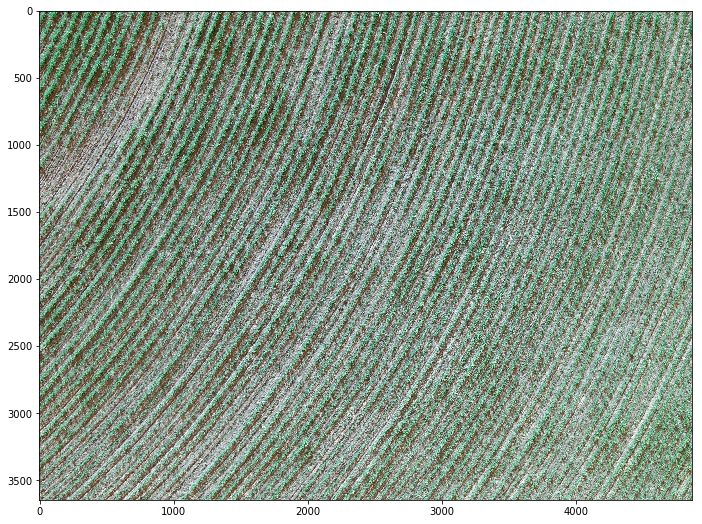

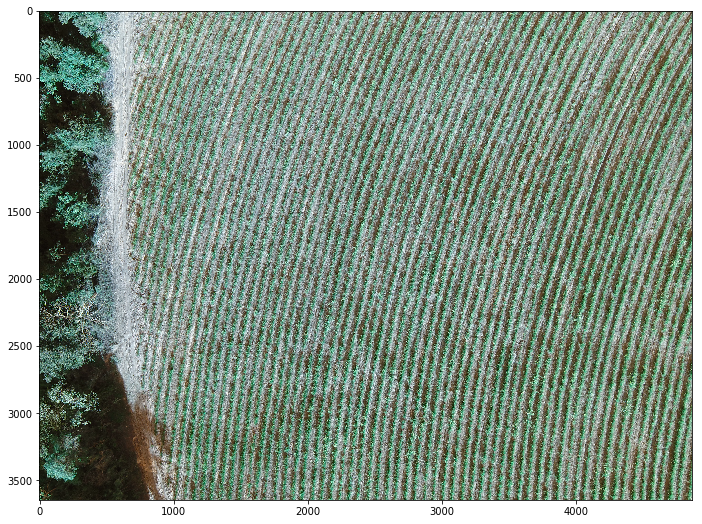

In [4]:
sugarcane_images = []
for i in zip(image_path, image_names):
        img = cv2.imread(i[0])
        image_dict = {"img": img,
                      "name": i[1]}
        sugarcane_images.append(image_dict)
        plt.figure(figsize=(16, 9))
        plt.imshow(img)
        plt.show()    

In [5]:
for i in sugarcane_images:
    print(i["img"].shape)

(3648, 4864, 3)
(3648, 4864, 3)


In [6]:
print("Vamos processar multiplas imagens através de um gerador")
pre_processors = SugarCanePreProcessing.multiple_processor(sugarcane_images, True)
print("Generator: ",pre_processors)
for i, j in zip(pre_processors, sugarcane_images):
    j["pre_processor"] = i
    print("generated object: ", i)


Vamos processar multiplas imagens através de um gerador
Generator:  <generator object SugarCanePreProcessing.multiple_processor at 0x10a643e08>
generated object:  <sugarcane_line_finder.SugarCanePreProcessing object at 0x10a66f860>
generated object:  <sugarcane_line_finder.SugarCanePreProcessing object at 0x10a66f2b0>


In [ ]:
sugarcane_images

[{'img': array([[[ 88,  68,  51],
          [ 97,  76,  61],
          [ 96,  78,  67],
          ..., 
          [210, 213, 204],
          [210, 213, 204],
          [194, 197, 188]],
  
         [[ 84,  62,  44],
          [ 93,  72,  57],
          [ 91,  74,  61],
          ..., 
          [206, 209, 200],
          [192, 195, 186],
          [173, 176, 167]],
  
         [[ 85,  63,  45],
          [ 92,  72,  55],
          [ 90,  71,  58],
          ..., 
          [195, 200, 191],
          [170, 174, 168],
          [153, 157, 151]],
  
         ..., 
         [[164, 177, 161],
          [168, 179, 163],
          [177, 184, 169],
          ..., 
          [140, 139, 119],
          [133, 131, 113],
          [147, 147, 129]],
  
         [[190, 205, 191],
          [185, 198, 184],
          [175, 184, 171],
          ..., 
          [125, 125, 107],
          [121, 121, 103],
          [135, 137, 118]],
  
         [[204, 219, 205],
          [192, 205, 191],
          [172

Segmentar a imagem tentado separar o que é fundo do que é cana de açúcar


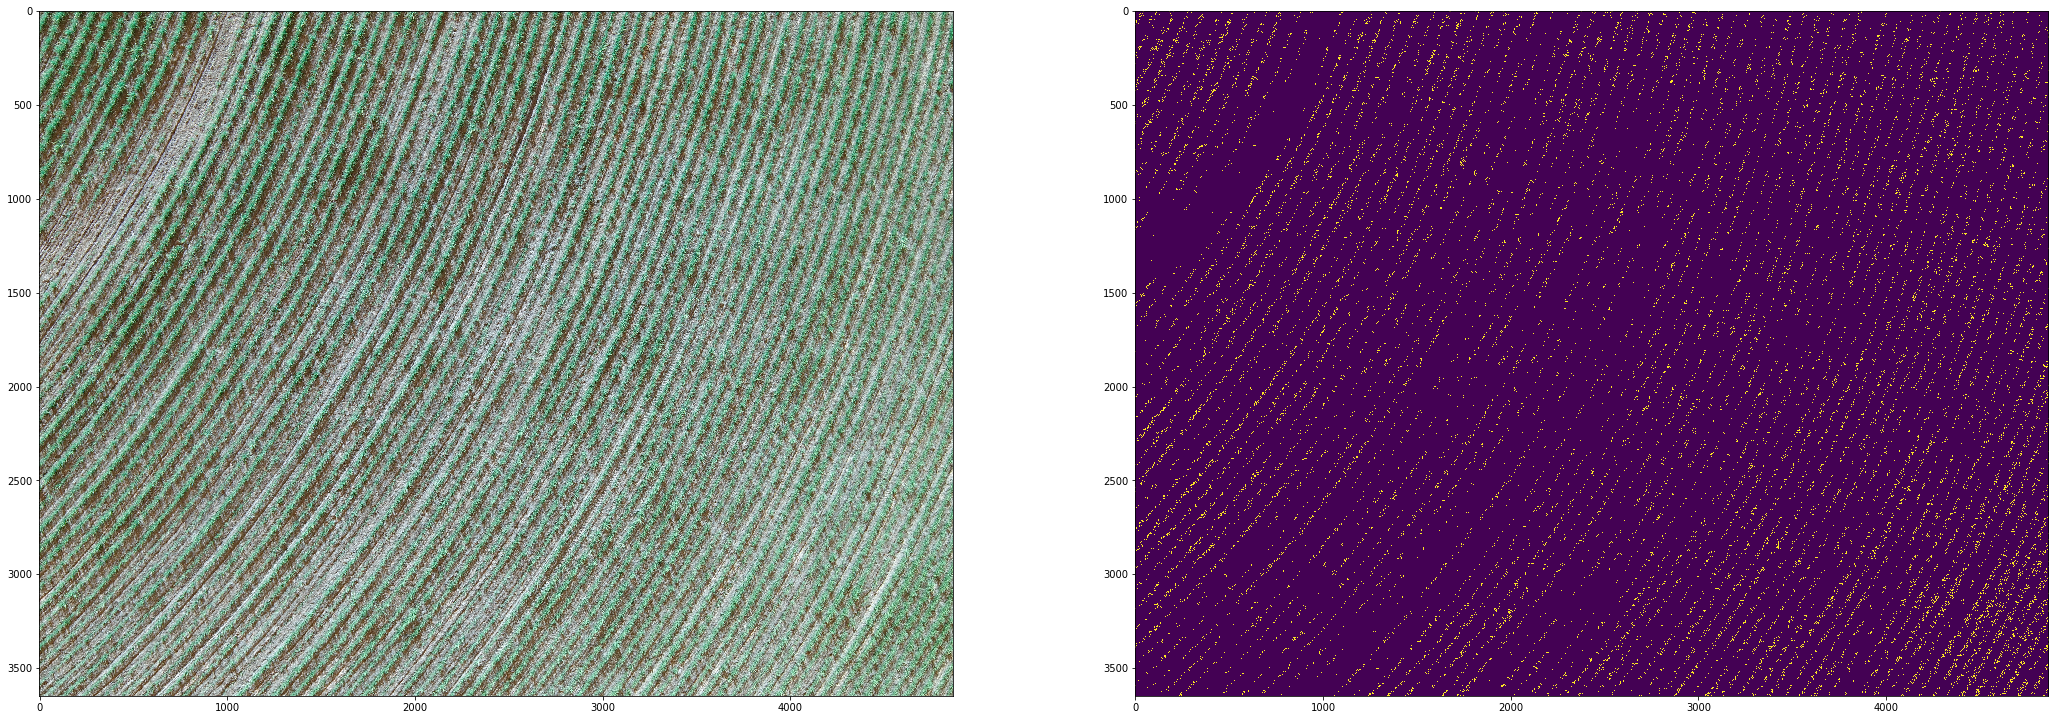

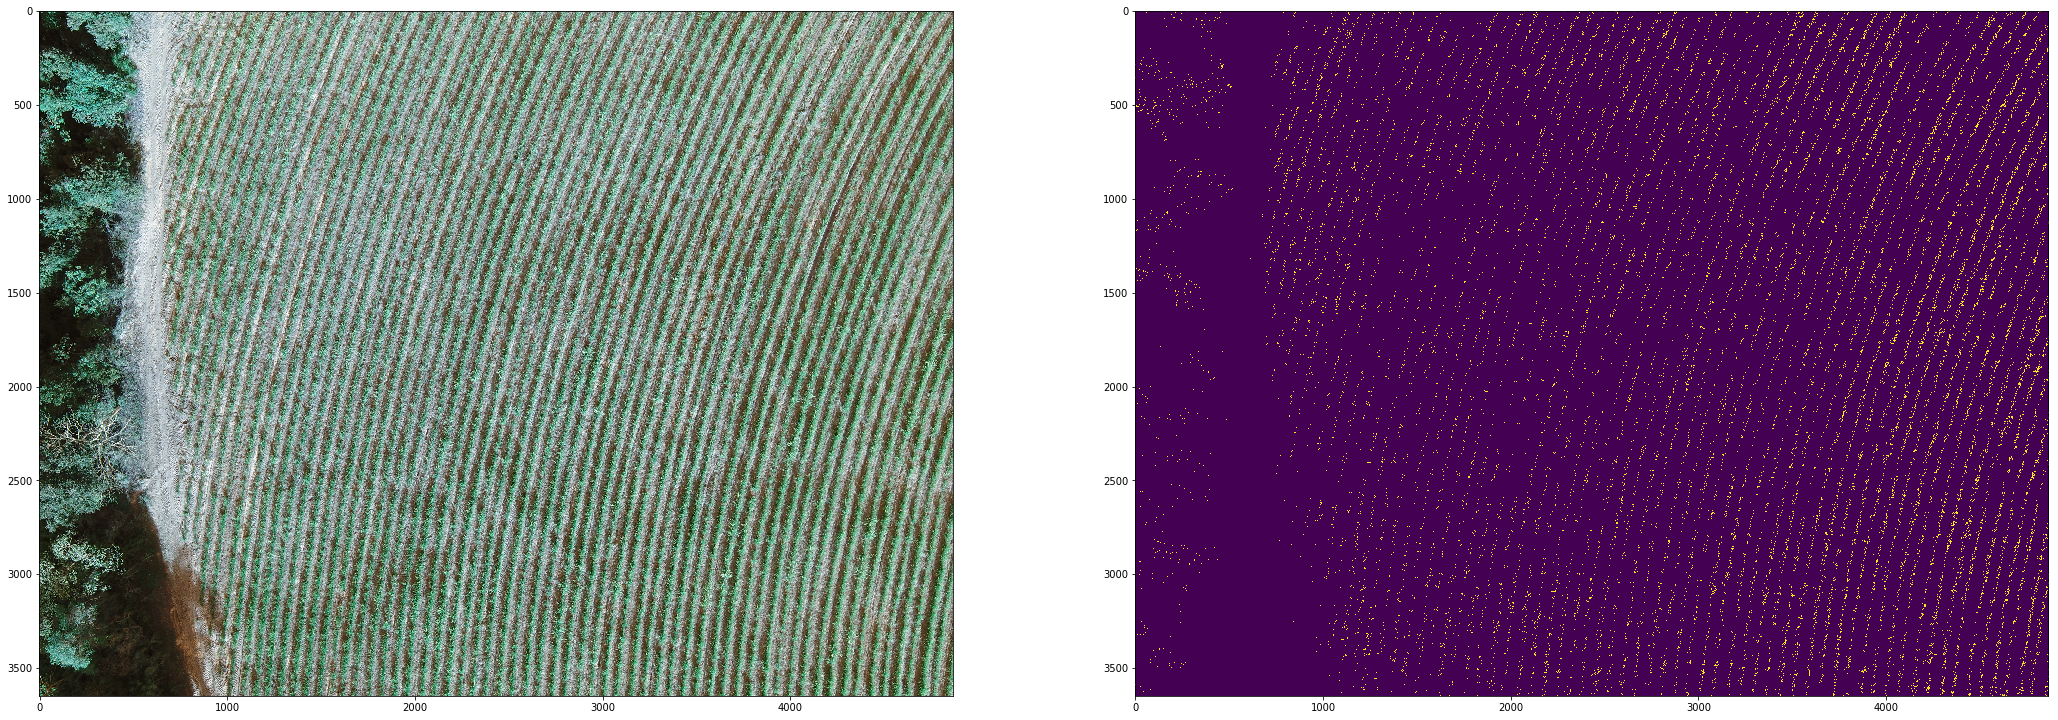

In [ ]:
print("Segmentar a imagem tentado separar o que é fundo do que é cana de açúcar")
for i in sugarcane_images:
    plt.figure(figsize=(36, 18))
    i["green_filtered"] = i["pre_processor"].select_rgb_green()
    plt.subplot(1, 2, 1)
    plt.imshow(i["img"])
    plt.subplot(1, 2, 2)
    plt.imshow(i["green_filtered"])
    plt.show()


In [ ]:
print("Erosão seguida de dilatação")
for i in sugarcane_images:
    i["erode_dilation"] = i["pre_processor"].morphological_transformation(i["green_filtered"], 1, 1, cv2.erode)
    i["erode_dilation"] = i["pre_processor"].morphological_transformation(i["erode_dilation"], 1, 1, cv2.erode)
    plt.figure(figsize=(36, 18))
    plt.subplot(1, 2, 1)
    plt.imshow(i["img"])
    plt.subplot(1, 2, 2)
    plt.imshow(i["erode_dilation"])
    plt.show()

Erosão seguida de dilatação


In [ ]:
print("Suavização Gaussiana")

for i in sugarcane_images:
    i["gauss_smooth"] = i["pre_processor"].gaussian_smooth(i["erode_dilation"])
    plt.figure(figsize=(36, 18))
    plt.subplot(1, 2, 1)
    plt.imshow(i["img"])
    plt.subplot(1, 2, 2)
    plt.imshow(i["gauss_smooth"])
    plt.show()

In [ ]:
print("Instancias objetos que procuram bordas pelo metodo de canny")


In [ ]:
for i in sugarcane_images:
    i["sugarcane_line_finder"] = SugarCaneLineFinder(i["gauss_smooth"], i["name"], True)
    i["edges"] = i["sugarcane_line_finder"].canny()
    plt.figure(figsize=(36, 18))
    plt.subplot(1, 2, 1)
    plt.imshow(i["img"])
    plt.subplot(1, 2, 2)
    plt.imshow(i["edges"])
    plt.show()

In [ ]:
for i in sugarcane_images:
    image = i["img"].copy()
    i["sugarcane_line_finder"].get_lines(image)
    i["countours"] = image
    print(i["sugarcane_line_finder"])
    plt.figure(figsize=(16, 9))
    plt.imshow(i["countours"])
    plt.show()  



## Conclusão

- Foi Possível segmentar a cultura da cana de açúcar.
- Os método de  Canny (1986) e Suzuki et al. (1985) foram capazes de identificar as linhas e falhas na cultura.
- Foi possível identificar e contar o numero de touceiras de cana.
- É necessário dar procedimento nos estudos.

## Bibliografia

AZEVEDO, E.; CONCI, A. Computação gráfica: teoria e prática. [S.l.]: Elsevier, 2003.<br/>
BROSNAN, T.; SUN, D.-W. Improving quality inspection of food products by computer vision—-a review. Journal of food engineering, Elsevier, v. 61, n. 1, p. 3–16, 2004.<br/>
BRUCE, J.; BALCH, T.; VELOSO, M. Fast and inexpensive color image segmentation for interactive robots. In: IEEE. Intelligent Robots and Systems, 2000.(IROS 2000). Proceedings. 2000 IEEE/RSJ International Conference on. [S.l.], 2000. v. 3, p. 2061–2066.<br/>
CANNY, J. A computational approach to edge detection. IEEE Transactions on pattern analysis and machine intelligence, Ieee, n. 6, p. 679–698, 1986.<br/>
DAVIS, G.; CASADY, W. W.; MASSEY, R. E. Precision agriculture: An introduction. Extension publications (MU), University of Missouri Extension, 1998.<br/>
GLASBEY, C. A.; HORGAN, G. W. Image analysis for the biological sciences. [S.l.]: Wiley Chichester, 1995. v. 1.<br/>
PHADIKAR, S.; SIL, J. Rice disease identification using pattern recognition techniques. In: IEEE. Computer and Information Technology, 2008. ICCIT 2008. 11th International Conference on. [S.l.], 2008. p. 420–423.<br/>
SOILLE, P. Morphological image analysis: principles and applications. [S.l.]: Springer Science & Business Media, 2013.<br/>
SUZUKI, S. et al. Topological structural analysis of digitized binary images by border following. Computer vision, graphics, and image processing, Elsevier, v. 30, n. 1, p. 32–46, 1985.<br/>
YAN’E, Z. et al. Nutrition information extraction of the cucumber leaves in the greenhouse based on computer vision technology [j]. Transactions of The Chinese Society of Agricultural Engineering, v. 8, p. 022, 2005.<br/>
